# Import annotations

In [2]:
import json
dii = json.load(open('data/dii/val.description-in-isolation.json', 'r'))

In [3]:
print(dii['type'])
print(dii['info'])

print("Fields:")
for key in dii.keys():
    print('', key, type(dii[key]))
    

albums = dii['albums'] 
annotations = dii['annotations'] 
images = dii['images'] 


print()
print(len(albums))
    
print("Album Fields:")
for subkey in albums[0].keys():
    print(' %s: %s' % (subkey,albums[0][subkey]))
    
print()
print(len(annotations))    
print("Annotation[0] Fields:")
for subkey in annotations[0][0].keys():
    print(' %s: %s' % (subkey,annotations[0][0][subkey]))
    
print()
print(len(images))
print("Image Fields:")
for subkey in images[7].keys():
    print(' %s: %s' % (subkey,images[0][subkey]))

description-in-isolation
SIND v1.0
Fields:
 albums <class 'list'>
 annotations <class 'list'>
 type <class 'str'>
 images <class 'list'>
 info <class 'str'>

998
Album Fields:
 date_create: 1183374254
 secret: 0745b37a62
 date_update: 1301274687
 description: Bubba burgers, beer and BBQ make for a great Fourth of July
 id: 72157600601428727
 owner: 67332546@N00
 farm: 2
 server: 1125
 vist_label: 4th_of_july
 photos: 15
 primary: 694227468
 title: Fourth of July 2007

14970
Annotation[0] Fields:
 original_text: Six or seven bottle rockets next to a specialty firework.
 photo_flickr_id: 694227468
 text: six or seven bottle rockets next to a specialty firework .
 album_id: 72157600601428727
 tier: descriptions-in-isolation
 photo_order_in_story: 0
 worker_id: WFCAHLMWB3LKKAX

21048
Image Fields:
 text: 
 datetaken: 2007-07-02 03:54:30
 longitude: 0
 media: photo
 secret: 0745b37a62
 album_id: 72157600601428727
 id: 694227468
 license: 5
 url_o: https://farm2.staticflickr.com/1125/6942274

In [4]:
im2texts = {}
for ann in annotations:
    ann = ann[0]
    im_id = ann["photo_flickr_id"]
    text  = ann["text"]
    
    if not im_id in im2texts:
        im2texts[im_id] = [text]
    else:
        im2texts[im_id].append(text)
#     if len(ann) != 1:
#         print(len(ann))

print(len(im2texts))
# for im_id in im2texts:
#     if len(im2texts[im_id]) != 1:
#         print(len(im2texts[im_id]))


4990


In [5]:
sis = json.load(open('data/sis/val.story-in-sequence.json', 'r'))

In [6]:

print(sis['type'])
print(sis['info'])

print("Fields:")
for key in sis.keys():
    print('', key, len(sis[key]), type(sis[key])) 
    
    
    
albums = sis['albums'] 
annotations = sis['annotations'] 
images = sis['images'] 


print()
print(len(albums))
    
print("Album Fields:")
for subkey in albums[0].keys():
    print(' %s: %s' % (subkey,albums[0][subkey]))
    
print()
print(len(annotations))    
print("Annotation[0] Fields:")
for subkey in annotations[0][0].keys():
    print(' %s: %s' % (subkey,annotations[0][0][subkey]))
    
    
    
print()
print(len(images))
print("Image Fields:")
for subkey in images[7].keys():
    print(' %s: %s' % (subkey,images[0][subkey]))

    
    

story-in-sequence
SIND v1.0
Fields:
 albums 998 <class 'list'>
 annotations 24950 <class 'list'>
 type 17 <class 'str'>
 images 21048 <class 'list'>
 info 9 <class 'str'>

998
Album Fields:
 date_create: 1183374254
 secret: 0745b37a62
 date_update: 1301274687
 description: Bubba burgers, beer and BBQ make for a great Fourth of July
 id: 72157600601428727
 owner: 67332546@N00
 farm: 2
 server: 1125
 vist_label: 4th_of_july
 photos: 15
 primary: 694227468
 title: Fourth of July 2007

24950
Annotation[0] Fields:
 setting: first-2-pick-and-tell
 original_text: My sister arrived early to help me with the family Bar BQ.
 storylet_id: 202350
 worker_arranged_photo_order: 0
 photo_flickr_id: 693397887
 text: my sister arrived early to help me with the family bar bq .
 story_id: 40470
 album_id: 72157600601428727
 tier: story-in-sequence
 worker_id: AS2MDFCRUS236TU

21048
Image Fields:
 text: 
 datetaken: 2007-07-02 03:54:30
 longitude: 0
 media: photo
 secret: 0745b37a62
 album_id: 72157600601

# Create maps/dictionaries

### topic2albums - album2topic

In [7]:
topic2albums = {}
album2topic = {}

for (i, album) in enumerate(albums):
    album_id = album['id']
    vist_label = album["vist_label"]
    
    album2topic[album_id] = vist_label
    
    if not vist_label in topic2albums: 
        topic2albums[vist_label] = [album_id]
    else: 
        topic2albums[vist_label].append(album_id)
    

print("Topics(%d)"%len(topic2albums))
for i,key in enumerate(topic2albums.keys()):         
    print("%d.%s (%d)"%(i,key, len(topic2albums[key])))

Topics(26)
0.beach (150)
1.camping (1)
2.day_parade (23)
3.carnival (57)
4.cooking_dinner (19)
5.bar_mitzvah (8)
6.car_accident (26)
7.church (47)
8.bat_mitzvah (2)
9.easter (50)
10.birthday_party (20)
11.eid_al-adha (2)
12.engagement (17)
13.award_ceremony (16)
14.MISC (60)
15.amusement_park (103)
16.breaking_up (77)
17.cinco_de_mayo (20)
18.4th_of_july (44)
19.eid_al-fitr (3)
20.birthday (87)
21.christmas (20)
22.bike_race (29)
23.building_a_house (98)
24.fair (14)
25.baby_shower (5)


### album2stories

In [8]:
album2stories = {}
for album in albums:
    album2stories[album["id"]] = set();

for ann in annotations:
    ann = ann[0]
    story_id = ann["story_id"]
    album_id = ann["album_id"]
    
    album2stories[album_id].add(story_id)
    
    
for album_id in album2stories.keys():
    album2stories[album_id] = list(album2stories[album_id])
    

In [9]:
# for key in topic2albums.keys():         
#     print(key)
#     print(topic2albums[key])
#     print()

### topic2stories

In [10]:
topic2stories = {}

for topic in topic2albums:
    topic2stories[topic] = []
    
    topic_albums = topic2albums[topic];
    for album_id in topic_albums:
        stories = album2stories[album_id]
        topic2stories[topic].extend(stories)
        
print("Topics(#stories)")
for i,key in enumerate(topic2stories.keys()):         
    print("%d.%s (%d)"%(i,key, len(topic2stories[key])))

Topics(#stories)
0.carnival (285)
1.building_a_house (490)
2.camping (5)
3.day_parade (115)
4.cooking_dinner (95)
5.car_accident (130)
6.church (235)
7.bat_mitzvah (10)
8.easter (250)
9.birthday_party (100)
10.4th_of_july (220)
11.engagement (85)
12.award_ceremony (80)
13.MISC (300)
14.amusement_park (515)
15.breaking_up (385)
16.cinco_de_mayo (100)
17.beach (750)
18.eid_al-fitr (15)
19.birthday (435)
20.christmas (100)
21.bike_race (145)
22.bar_mitzvah (40)
23.fair (70)
24.baby_shower (25)
25.eid_al-adha (10)


In [11]:
# print(topic2stories['birthday'])
# import pickle
# with open("topic2stories", 'wb') as output:
#         pickle.dump(topic2stories, output)


### stories2annotations

In [12]:
import pickle
stories2annotations = {}
with open("stories2annotations", 'rb') as file:
        stories2annotations = pickle.load(file)
        

In [13]:
anns = stories2annotations[topic2stories["beach"][0]]
for ann in anns:
    ann = annotations[ann][0]
#     print(ann)
#     photo_id = ann["photo_id"]
    print(ann['text'])
# print()

it was to be a day on the beach . i did not know what to think , but i know that we had a good time .
here she is . my lover and the person that i care about the most . she looked so good on the water .
she took the camera from me . here i am right after she took it .
she took some photos of the beach , and waves . it was such a gorgeous day .
we had such a good time that day . here is a selfie while she was kissing me .


## HTML GENERATION

In [17]:
from random import shuffle


import pickle 
with open("image2dii", 'rb') as file:
        image2dii = pickle.load(file)
        
print(len(image2dii))

num_of_stories = 2
shuffle_stories = True

    
content = ""    
td_width = 50

c = 0
for topic in topic2stories:
    if c > 5:
        pass #break
    c += 1   
    if shuffle_stories:
        shuffle(topic2stories[topic])
        
    stories = topic2stories[topic][:num_of_stories]
    
    #topic
    content += '<h2 >%s</h2>\n' % topic 
    
    
    print ('Topic : ', topic)
    for story in stories:
        
        #story id
        content += '<h3> Story id: %s </h3>\n' % story
        
        content += '<table cellspacing="10"><tbody>'

        tr = '<tr>'
        #image 
        for image in stories2annotations[story]:
            image_id = sis['annotations'][image][0]['photo_flickr_id']
            filename = "data/val.images/" + image_id + ".jpg"
            td = '<td  width="%d"><img src="%s" align="middle"  /></td>'%(td_width,filename)
            tr += td
        content += tr + "\n"
        
        tr = "<tr>"
        #sis text
        for image in stories2annotations[story]:
            image_sis = sis['annotations'][image][0]['text']
            td = '<td  width="%d"><b>SIS: </b> %s</td>' %(td_width, image_sis)
            tr += td
        content += tr + "\n"
        
        tr = "<tr>"
        #dii text
        for image in stories2annotations[story]:
            image_id = sis['annotations'][image][0]['photo_flickr_id']
            image_dii = image2dii[image_id][0]
            td = '<td  width="%d"><b>DII: </b> %s </td>' % (td_width, image_dii)
            tr += td
        content += tr + "\n"
        
        tr = "<tr>"
        #tags
        for image in stories2annotations[story]:
            image_id = sis['annotations'][image][0]['photo_flickr_id']
            
            image_tags = image2dii[image_id][1]
            td = '<td  width="%d"><b>Tags: </b> %s</td>' % (td_width,image_tags.replace(" ", ", "))
            tr += td
        content += tr + "\n"
        
    
        content += "</tbody></table>\n"
    
# print(content)

21048
Topic :  carnival
Topic :  building_a_house
Topic :  camping
Topic :  day_parade
Topic :  cooking_dinner
Topic :  car_accident
Topic :  church
Topic :  bat_mitzvah
Topic :  easter
Topic :  birthday_party
Topic :  4th_of_july
Topic :  engagement
Topic :  award_ceremony
Topic :  MISC
Topic :  amusement_park
Topic :  breaking_up
Topic :  cinco_de_mayo
Topic :  beach
Topic :  eid_al-fitr
Topic :  birthday
Topic :  christmas
Topic :  bike_race
Topic :  bar_mitzvah
Topic :  fair
Topic :  baby_shower
Topic :  eid_al-adha


In [18]:

with open('prefix.txt', 'rb') as prefix_file:
    prefix = prefix_file.read()
    
with open('postfix.txt', 'rb') as postfix_file:
    postfix = postfix_file.read()    

html_content =  prefix + content.encode("utf-8") + postfix

In [19]:
with open('result.html', 'wb') as html_file:
    html_file.write(html_content)

### download and show an image

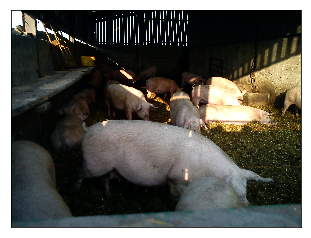

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
from PIL import Image
import urllib.request
import shutil
%matplotlib inline

pos = 1554;
url = images[pos]['url_o']
id = images[pos]['id']
    
filename =  id + ".jpg"

if not os.path.isfile("data/images/" + filename):
    urllib.request.urlretrieve(url, "data/images/" + filename)
im = mpimg.imread("data/images/" + filename)

plt.xticks([]," ")
plt.yticks([]," ")
plt.imshow(im)
plt.show()



# VGG16

In [ ]:
from data.VGG16 import vgg16
import tensorflow as tf
import time
from scipy.misc import imread, imresize
import numpy as np
from data.VGG16.imagenet_classes import class_names

In [ ]:
sess = tf.Session()
imgs = tf.placeholder(tf.float32, [None, 224, 224, 3])
vgg = vgg16.vgg16(imgs, 'data/vgg16/vgg16_weights.npz', sess)

In [109]:


img1 = imread('data/vgg16/laska.png', mode='RGB')
img1 = imresize(img1, (224, 224))


img2 = imread('data/val.images/1751489.jpg', mode='RGB')
img2 = imresize(img2, (224, 224))


prob = sess.run(vgg.probs, feed_dict={vgg.imgs: [img2]})[0]
preds = (np.argsort(prob)[::-1])[0:5]
print("Probs:")
for p in preds:
    print(" ",class_names[p], prob[p])
# print(prob)
start = time.time()
features = sess.run(vgg.fc2, feed_dict={vgg.imgs: [img1]})[0]
print("Features")
print(" ", features)

end = time.time();
print((end - start) / 10)   

Probs:
  canoe 0.586768
  gondola 0.347251
  paddle, boat paddle 0.0575605
  lakeside, lakeshore 0.00171236
  lifeboat 0.00114182
Features
  [ 0.          0.          0.57156652 ...,  0.          0.          0.        ]
0.050977134704589845


In [18]:
vgg.__dict__

{'conv1_1': <tf.Tensor 'conv1_1:0' shape=(?, 224, 224, 64) dtype=float32>,
 'conv1_2': <tf.Tensor 'conv1_2:0' shape=(?, 224, 224, 64) dtype=float32>,
 'conv2_1': <tf.Tensor 'conv2_1:0' shape=(?, 112, 112, 128) dtype=float32>,
 'conv2_2': <tf.Tensor 'conv2_2:0' shape=(?, 112, 112, 128) dtype=float32>,
 'conv3_1': <tf.Tensor 'conv3_1:0' shape=(?, 56, 56, 256) dtype=float32>,
 'conv3_2': <tf.Tensor 'conv3_2:0' shape=(?, 56, 56, 256) dtype=float32>,
 'conv3_3': <tf.Tensor 'conv3_3:0' shape=(?, 56, 56, 256) dtype=float32>,
 'conv4_1': <tf.Tensor 'conv4_1:0' shape=(?, 28, 28, 512) dtype=float32>,
 'conv4_2': <tf.Tensor 'conv4_2:0' shape=(?, 28, 28, 512) dtype=float32>,
 'conv4_3': <tf.Tensor 'conv4_3:0' shape=(?, 28, 28, 512) dtype=float32>,
 'conv5_1': <tf.Tensor 'conv5_1:0' shape=(?, 14, 14, 512) dtype=float32>,
 'conv5_2': <tf.Tensor 'conv5_2:0' shape=(?, 14, 14, 512) dtype=float32>,
 'conv5_3': <tf.Tensor 'conv5_3:0' shape=(?, 14, 14, 512) dtype=float32>,
 'fc1': <tf.Tensor 'fc1/Relu:0' 